In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# gans-n-gmms/concatenated_results_32/celeba_mfa_10c_10l/log.csv

In [6]:
colnames=['iterations', 'train LL', 'test LL', 'mean_noise_variance'] 
#df_5c = pd.read_csv('log5c.csv',names=colnames, header=None).assign(component=5)
df_10c = pd.read_csv('/home/px48/gans-n-gmms/concatenated_results_32/celeba_mfa_10c_10l/log.csv',names=colnames, header=None).assign(component = 10)
df_15c = pd.read_csv('/home/px48/gans-n-gmms/concatenated_results_32/celeba_mfa_15c_10l/log.csv',names=colnames, header=None).assign(component = 15)
df_50c = pd.read_csv('/home/px48/gans-n-gmms/concatenated_results_32/celeba_mfa_50c_10l/log.csv',names=colnames, header=None).assign(component = 50)
#df_100c = pd.read_csv('log100c.csv',names=colnames, header=None).assign(component = 100)
#df_200c = pd.read_csv('log200c.csv',names=colnames, header=None).assign(component = 200)

In [7]:
#cdf = pd.concat([df_5c, df_10c, df_20c,df_50c,df_100c, df_200c])
cdf = pd.concat([df_10c, df_15c, df_50c])
cdf

,iterations,train LL,test LL,mean_noise_variance,component
0,0,-1312.838989,-1224.863171,0.135880,10
1,100,-1255.730103,-1192.547852,0.136045,10
2,200,-1262.257568,-1163.383545,0.136238,10
3,300,-1053.319946,-1137.240967,0.136405,10
4,400,-1118.926758,-1115.698608,0.136580,10
...,...,...,...,...,...
95,9500,-654.789734,-802.800568,0.129696,50
96,9600,-592.356689,-802.617676,0.129676,50
97,9700,-616.985229,-802.284180,0.129652,50
98,9800,-580.577209,-801.635156,0.129628,50


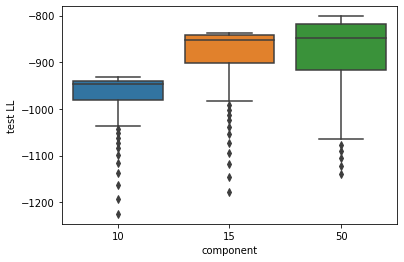

In [8]:
ax = sns.boxplot(x="component", y="test LL", data=cdf)  # RUN PLOT   
plt.show()

In [10]:
df_5c = df_5c.assign(maxll= lambda x : df_5c['train LL'].max())
df_10c = df_10c.assign(maxll= lambda x : df_10c['train LL'].max())
df_20c = df_20c.assign(maxll= lambda x : df_20c['train LL'].max())
df_50c = df_50c.assign(maxll= lambda x : df_50c['train LL'].max())
df_100c = df_100c.assign(maxll= lambda x : df_100c['train LL'].max())
df_200c = df_200c.assign(maxll= lambda x : df_200c['train LL'].max())

In [11]:
aic_cdf = pd.concat([df_5c, df_10c, df_20c,df_50c,df_100c,df_200c])
aic_cdf = aic_cdf.assign(AIC = lambda x : 2*aic_cdf['component'] - 2*np.log(aic_cdf['maxll']))#aic = 2p - 2log(L)
aic_cdf

,iterations,train LL,test LL,mean_noise_variance,component,maxll,AIC
0,0,2561.975098,2554.133545,0.013319,5,2913.930176,-5.954516
1,100,2524.460938,2598.922974,0.013178,5,2913.930176,-5.954516
2,200,2627.299805,2634.849780,0.013050,5,2913.930176,-5.954516
3,300,2609.964355,2664.665112,0.012935,5,2913.930176,-5.954516
4,400,2754.866211,2688.998535,0.012846,5,2913.930176,-5.954516
...,...,...,...,...,...,...,...
95,9500,3706.482666,3511.751099,0.010495,200,3786.350098,383.521684
96,9600,3705.199707,3512.468262,0.010491,200,3786.350098,383.521684
97,9700,3692.325195,3512.857886,0.010489,200,3786.350098,383.521684
98,9800,3649.374512,3513.749756,0.010486,200,3786.350098,383.521684


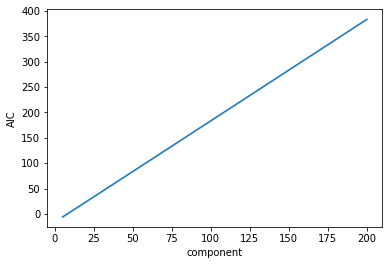

In [12]:
AIC_plot = sns.lineplot(data=aic_cdf, x="component", y="AIC") 
plt.show()

In [13]:
from sklearn.linear_model import LassoLarsIC

In [14]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(aic_cdf, aic_cdf['component'])
alpha_aic_ = model_aic.alpha_
EPSILON = 1e-4

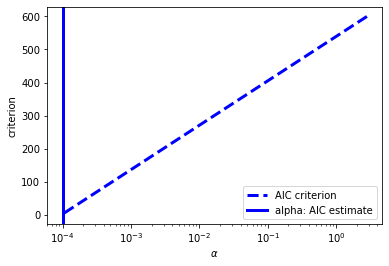

In [15]:
def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
#plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()